In [1]:
import pandas as pd

In [2]:
# 데이터 프레임을 불러오거나 제작

df = pd.DataFrame({"v1":[100,200,300,400], "v2":[400,200,100,250], "v3":[40,60,60,100]})

In [3]:
# 피어슨 상관 계수
corr = df.corr(method = 'pearson') 
corr

,v1,v2,v3
v1,1.000000,-0.568038,0.923381
v2,-0.568038,1.000000,-0.291397
v3,0.923381,-0.291397,1.000000


In [4]:
#matplotlib은 파이썬에서 기본적인 차트를 쉽게 그릴 수 있도록 도와주는 데이터 시각화 라이브러리

# seaborn은 matplotlib을 기반으로 만들어져 통계 데이터 시각화에 최적화된 라이브러리

In [6]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ---------------------------------------- 37.0/37.0 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

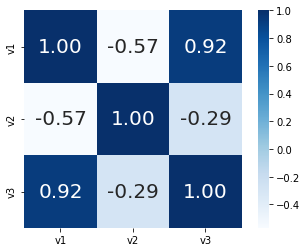

In [9]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

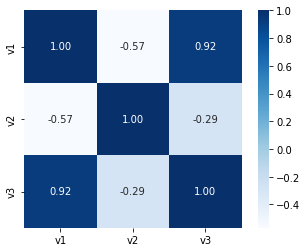

In [10]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')

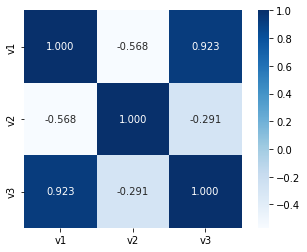

In [11]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.3f', square = True, cmap = 'Blues')

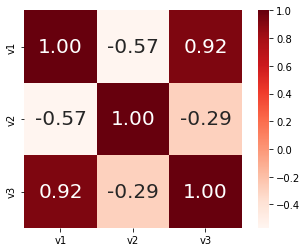

In [12]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Reds')

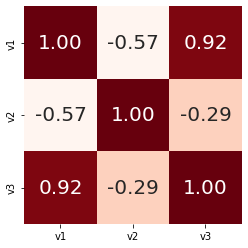

In [13]:
df_heatmap = sns.heatmap(corr, cbar = False, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Reds')

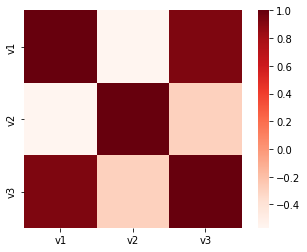

In [14]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = False, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Reds')

## pandas모듈의 pandas.read_html()을 이용해 종목코드를 가져오기
pandas.read_html()은 HTML에서 태그를 찾아 자동으로 DataFrame형식으로 만들어준다.
아래의 소스코드를 통해 주식의 종목코드를 가져올 수 있다

In [15]:
import pandas as pd 
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0] 
# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format) 
# 우리가 필요한 것은 회사명과 종목코드이기 때문에 필요없는 column들은 제외해준다. 
code_df = code_df[['회사명', '종목코드']] 
# 한글로된 컬럼명을 영어로 바꿔준다. 
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'}) 
code_df.head(10)

,name,code
0,DL,000210
1,DRB동일,004840
2,DSR,155660
3,GS,078930
4,KG케미칼,001390
5,KPX케미칼,025000
6,KTis,058860
7,LG이노텍,011070
8,LG헬로비전,037560
9,LX하우시스,108670


In [16]:
code_df.to_csv("stock_symbol.csv" , encoding='utf-8-sig')

In [18]:
!pip uninstall html5lib

^C


In [21]:
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러와 
# 네이버 금융(http://finance.naver.com)에 넣어줌 
def get_url(item_name, code_df): 
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False) 
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
    print("요청 URL = {}".format(url)) 
    return url 

# # 신라젠의 일자데이터 url 가져오기 
item_name='삼성전자' 
url = get_url(item_name, code_df) 

# # 일자 데이터를 담을 df라는 DataFrame 정의 

df = pd.DataFrame() 
df

# # 1페이지에서 20페이지의 데이터만 가져오기 


#pd.read_html('http://finance.naver.com/item/sise_day.nhn?code=005930', header=0)
# for page in range(1, 21): 
#     pg_url = '{url}&page={page}'.format(url=url, page=page) 
#     df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True) 
    
          
#     # df.dropna()를 이용해 결측값 있는 행 제거 
#     df = df.dropna() # 상위 5개 데이터 확인하기 
#     df.head()

요청 URL = http://finance.naver.com/item/sise_day.nhn?code=005930


""
